In [1]:
from fastai.vision.widgets import *

In [2]:
#hide
#!pip install -U duckduckgo_search
from duckduckgo_search import DDGS

In [3]:
# def search_images_duck(keywords, max_results=10):
#     with DDGS() as ddgs:
#         ddgs_images_gen = ddgs.images(
#           keywords,
#           region="wt-wt",
#           safesearch="off",
#           size=None,
#           color=None,
#           type_image=None,
#           layout=None,
#           license_image=None,
#           max_results=max_results,
#         )
#         # for r in ddgs_images_gen:
#         #     print(r['image'])
#         results = [x['image'] for x in ddgs_images_gen]
#     return results

In [4]:
#results = search_images_duck('grizzly bear', 1)
#len(results)

In [5]:
# 源数据地址 https://www.cvmart.net/dataSets/detail/526?channel_id=op10&utm_source=cvmartmp&utm_campaign=datasets&utm_medium=article
from pathlib import Path
path = Path('flowers')
path.ls()

(#5) [Path('flowers/rose'),Path('flowers/tulip'),Path('flowers/daisy'),Path('flowers/sunflower'),Path('flowers/dandelion')]

In [6]:
from fastai.data.transforms import get_image_files
fns = get_image_files(path)

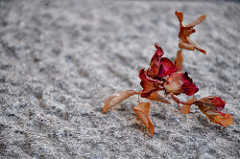

In [7]:
from PIL import Image
img = Image.open(fns[0])
img

In [8]:
img.size

(240, 159)

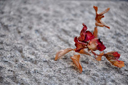

In [10]:
img.to_thumb(128,128)

In [11]:
[Image.open(x).size for x in fns[:5]]

[(240, 159), (217, 240), (240, 159), (320, 240), (320, 240)]

In [12]:
from fastai.vision.utils import verify_images
failed = verify_images(fns)
failed

(#0) []

In [13]:
from fastai.vision.data import *
from fastai.vision.core import *

In [14]:
from fastai.data.block import CategoryBlock, RandomSplitter, DataBlock
from fastai.data.transforms import parent_label
from fastai.vision.all import Resize, aug_transforms, RandomResizedCrop, vision_learner, resnet18, error_rate

In [15]:
flowers = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=1),
    get_y=parent_label,
    item_tfms=Resize(128))

In [16]:
dls = flowers.dataloaders(path)

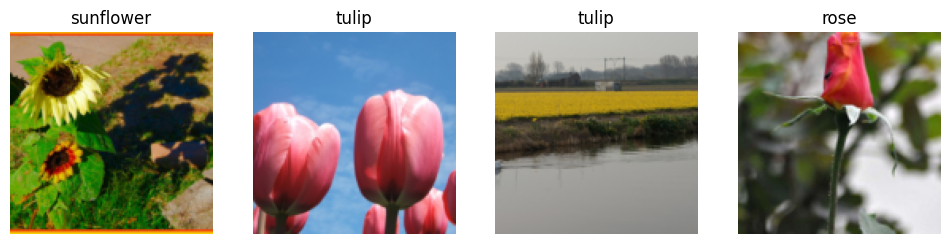

In [17]:
dls.valid.show_batch(max_n=4,nrows=1)

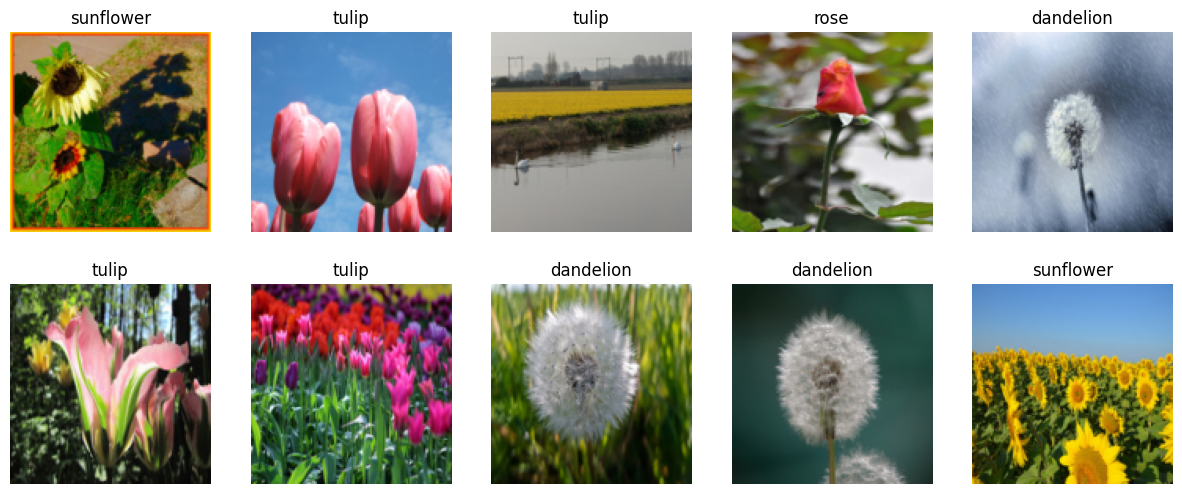

In [18]:
from fastai.vision.all import ResizeMethod
flowers = flowers.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = flowers.dataloaders(path)
dls.valid.show_batch(max_n=10, nrows=2)

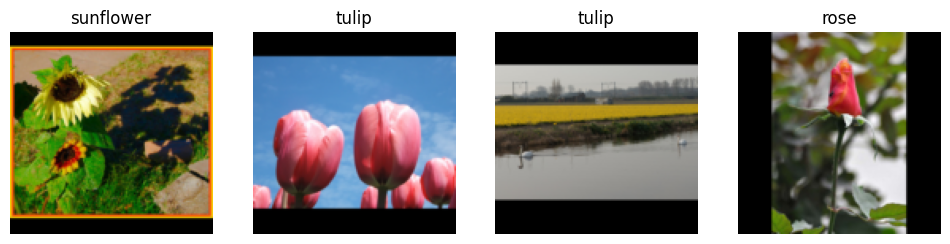

In [19]:
flowers = flowers.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = flowers.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

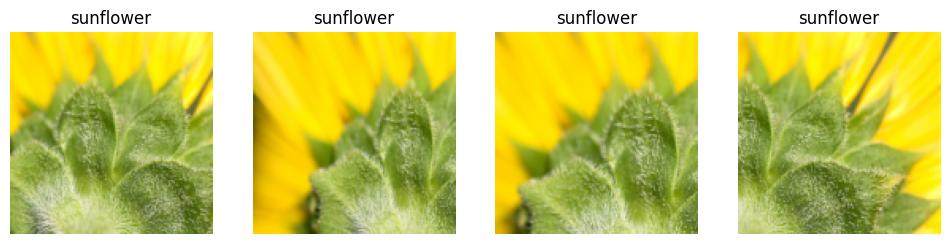

In [20]:
flowers = flowers.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = flowers.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

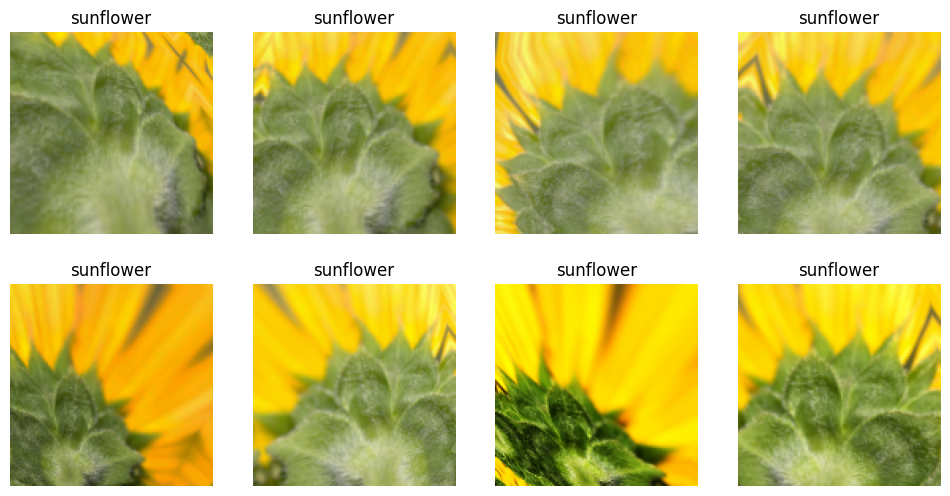

In [21]:
flowers = flowers.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = flowers.dataloaders(path)
dls.train.show_batch(max_n=8, unique=True)

In [29]:
flowers = flowers.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = flowers.dataloaders(path)

In [30]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.065245,0.424792,0.133256,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.476346,0.292875,0.084589,00:04
1,0.392438,0.276810,0.081112,00:05
2,0.303393,0.268878,0.086906,00:05
3,0.232557,0.211976,0.060255,00:05
4,0.171298,0.221346,0.064890,00:05
5,0.125799,0.244715,0.066049,00:04
6,0.105675,0.199873,0.056779,00:05
7,0.081947,0.189064,0.053302,00:05
8,0.070623,0.183873,0.050985,00:05
9,0.059695,0.181494,0.049826,00:05


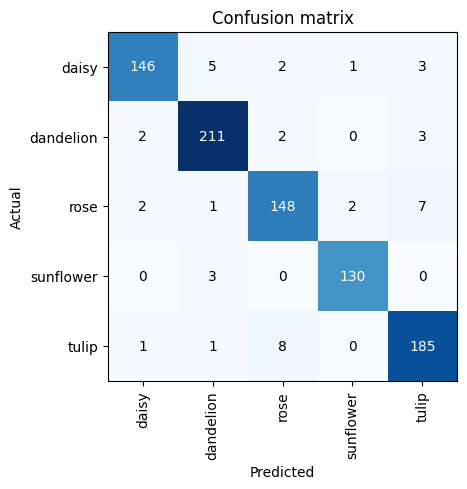

In [31]:
from fastai.vision.all import ClassificationInterpretation
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

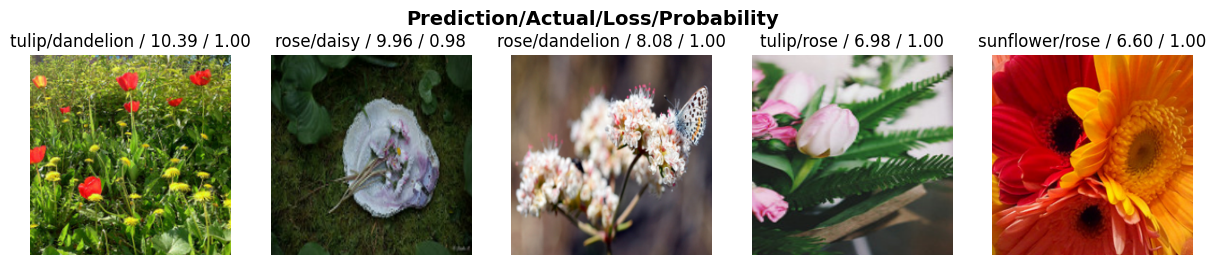

In [32]:
interp.plot_top_losses(5, nrows=1)

In [26]:
from fastai.vision.widgets import ImageClassifierCleaner
cleaner = ImageClassifierCleaner(learn)

In [27]:
cleaner

In [28]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [33]:
learn.export()

In [38]:
from fastai.vision.all import load_learner
learn_inf = load_learner(path/'export.pkl')

In [40]:
learn_inf.predict(path/'daisy/100080576_f52e8ee070_n.jpg')

('daisy',
 tensor(0),
 tensor([1.0000e+00, 2.0141e-07, 3.0725e-07, 8.7971e-08, 1.8892e-07]))

In [41]:
learn.dls.vocab

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']